# Sankey Particle Filtering Visualizations

## Initial testing of a basic sankey diagram

In [19]:
'''Entry point for the particle filtering code '''

import sys
sys.path.append('../')
import numpy as np

from Implementations.algorithms.TimeDependentBeta import TimeDependentAlgo
from Implementations.resamplers.resamplers import PoissonResample,NBinomResample
from Implementations.solvers.DeterministicSolvers import LSODACalvettiSolver,LSODASolver,LSODASolverSEIARHD
from Implementations.perturbers.perturbers import MultivariatePerturbations
from utilities.Utils import Context,ESTIMATION
from functools import partial


'''Algorithm object encapsulating all the requirements

The integrator is an object which runs the t->t+1 propagation of the particles, primarily using the LSODA 
integrator built in to scipy.integrate(solve_ivp)

The perturb object performs multivariate perturbations on the state variables and the estimated variables

The resampler computes the weights and resamples based on a known algorithm(multinomial,systematic,residual)



'''
algo = TimeDependentAlgo(integrator = LSODASolver(),
                        perturb = MultivariatePerturbations(hyper_params={"h":0.5,"sigma1":0.05,"sigma2":0.1}),
                        resampler = NBinomResample(),
                        ctx=Context(sankey_indices = [],
                                    population=7_700_000,
                                    state_size = 4,
                                    prior_weights=np.zeros(1000),
                                    pos_weights = np.zeros(1000),
                                    weight_ratio=np.ones(1000),
                                    seed_loc=[1],
                                    seed_size=0.005,
                                    forward_estimation=1,
                                    rng=np.random.default_rng(),
                        particle_count=10))

algo.initialize(params={
"beta":ESTIMATION.VARIABLE,
"gamma":0.06,
"mu":0.004,
"q":0.1,
"eta":1/7,
"std":10,
"R":50,
"hosp":ESTIMATION.STATIC,
"L":90,
"D":10,
}
,priors={"beta":partial(algo.ctx.rng.uniform,0.1,0.6), 
          "gamma":partial(algo.ctx.rng.uniform,0,1/7),
          "eta":partial(algo.ctx.rng.uniform,1/15,1/3),
          "hosp":partial(algo.ctx.rng.uniform,5,20),
          "D":partial(algo.ctx.rng.uniform,0,20)
          })

'''Runs the PF over the specified data set for the specified length of time'''

#algo.print_particles()
algo.run(f'../datasets/WA_FLU_HOSPITALIZATIONS.csv',150)



/home/andrew/.local/lib/python3.11/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

func:'run' args:[(<Implementations.algorithms.TimeDependentBeta.TimeDependentAlgo object at 0x7faef57ee5d0>, '../datasets/WA_FLU_HOSPITALIZATIONS.csv', 150), {}] took: 3.0049 sec


## Switching gears -- testing a different type of chart

### Better version with some issues:
- We have an initial time-step problem. 
- The "particle lineage" is not being tracked. 

Array 1: [0. 1. 2. 3. 4.] ... [495. 496. 497. 498. 499.]
Array 2: [172.  47. 117. 192. 323.] ... [343. 449. 326. 490.  53.]
Array 3: [304.  94.  59. 336. 154.] ... [219. 355. 441. 454. 403.]
Array 4: [1. 1. 1. 1. 1.] ... [1. 1. 1. 1. 1.]
Array 5: [162.  50. 242. 358.  20.] ... [ 44. 271.  87. 459.  77.]
Array 6: [413.  95. 110. 210. 132.] ... [462. 418.  29.  51. 473.]
Array 7: [437. 260. 192. 379. 154.] ... [470. 256.  81. 186.  12.]
Array 8: [1. 1. 1. 1. 1.] ... [499. 499. 499. 499. 499.]
Array 9: [219. 299. 438. 381. 431.] ... [107. 149.  78. 269. 488.]
Array 10: [ 67. 361. 401. 261.  26.] ... [393. 374. 308. 299. 337.]


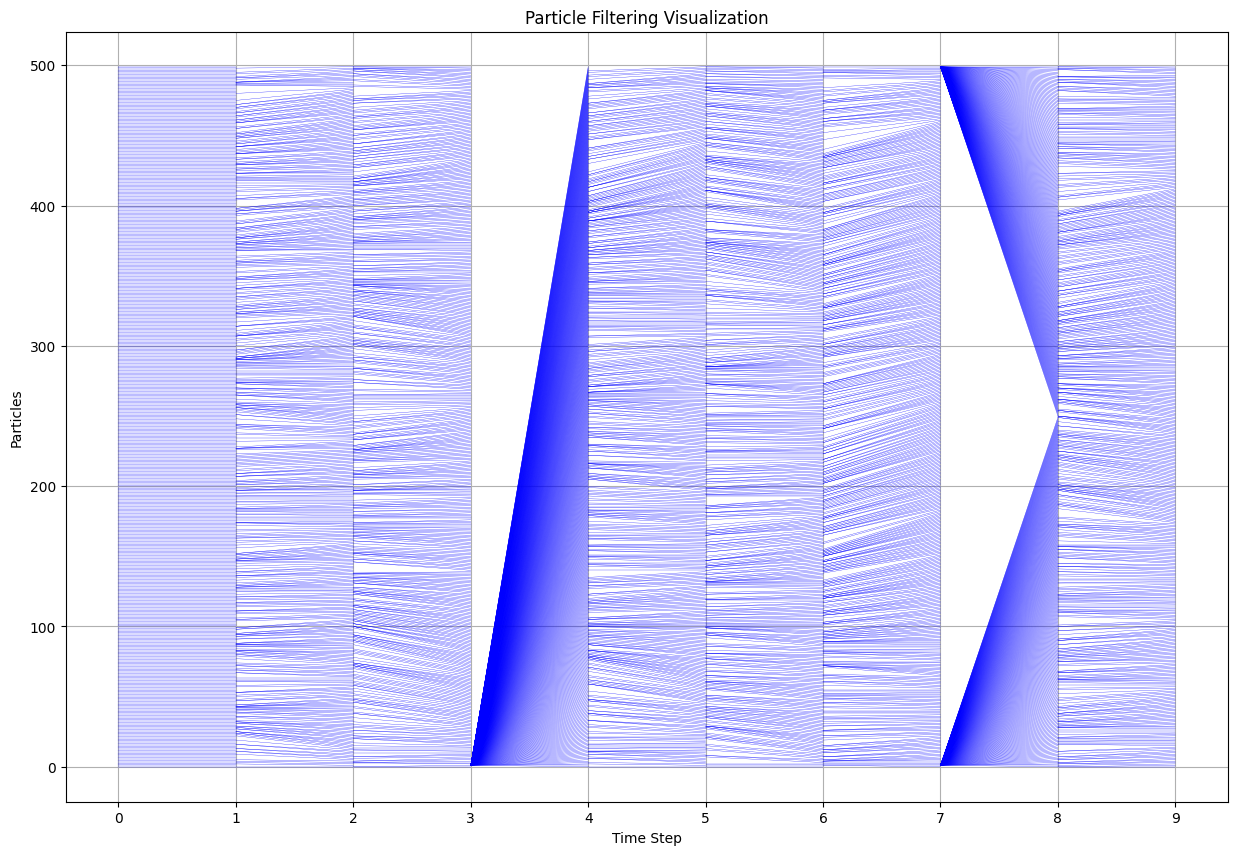

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 8))

num_of_particles = 500

# Simulate the resampling indices 
np.random.seed(0)
resampling_indices = np.array([
    np.arange(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 1 prev. particle
    np.ones(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 2 prev. particles
    np.concatenate([np.ones(int(num_of_particles / 2)), num_of_particles - np.ones(int(num_of_particles / 2))]),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True)
])

# Print the first few elements of first few arrays for verification/debugging
for i, arr in enumerate(resampling_indices):
    print(f"Array {i+1}: {arr[:5]} ... {arr[num_of_particles-5:]}")

# sort each step's resampling indices based on the previous step
# to keep track of each particle's position 
positions = np.zeros_like(resampling_indices)
positions[0] = np.arange(num_of_particles)  # Initial positions are just the particle indices

for step in range(1, len(resampling_indices)):
    order = np.argsort(resampling_indices[step-1])
    positions[step] = np.argsort(order)

for step in range(1, len(positions)):
    # this sort might undo the tracking/lineage of particles??
    np.sort(resampling_indices[step])
    for p in range(num_of_particles):
        plt.plot([step-1, step], [resampling_indices[step-1][p], positions[step, p]], linestyle='solid', color='blue', markersize=0.1, linewidth=0.2)

# TODO: Trace the ending particles back through the chart in red?

plt.xlabel('Time Step')
plt.ylabel('Particles')
plt.title('Particle Filtering Visualization')
plt.grid(True)
plt.xticks(np.arange(len(resampling_indices)))
plt.show()


## Improved version that should track the lineage of each particle. 
### In addition, the initial time step issue is resolved with the refactored algorithm.
### Note: Each following code/chart just changes the number of particles. 

Array 1: [0. 1. 2. 3. 4.] ... [95. 96. 97. 98. 99.]
Array 2: [44. 47. 64. 67. 67.] ... [23. 79. 13. 85. 48.]
Array 3: [49. 69. 41. 35. 64.] ... [83. 33. 32. 70. 85.]
Array 4: [1. 1. 1. 1. 1.] ... [1. 1. 1. 1. 1.]
Array 5: [31. 13. 71. 56. 24.] ... [30. 29. 33. 18. 17.]
Array 6: [93. 84.  2. 69. 12.] ... [99. 18. 34. 51. 30.]
Array 7: [53. 58. 43. 55. 18.] ... [ 3. 12. 58.  1.  0.]
Array 8: [1. 1. 1. 1. 1.] ... [99. 99. 99. 99. 99.]
Array 9: [39. 24. 58. 36. 99.] ... [80. 61. 60. 47.  0.]
Array 10: [10. 75. 13. 71. 94.] ... [78. 82. 69. 58.  4.]


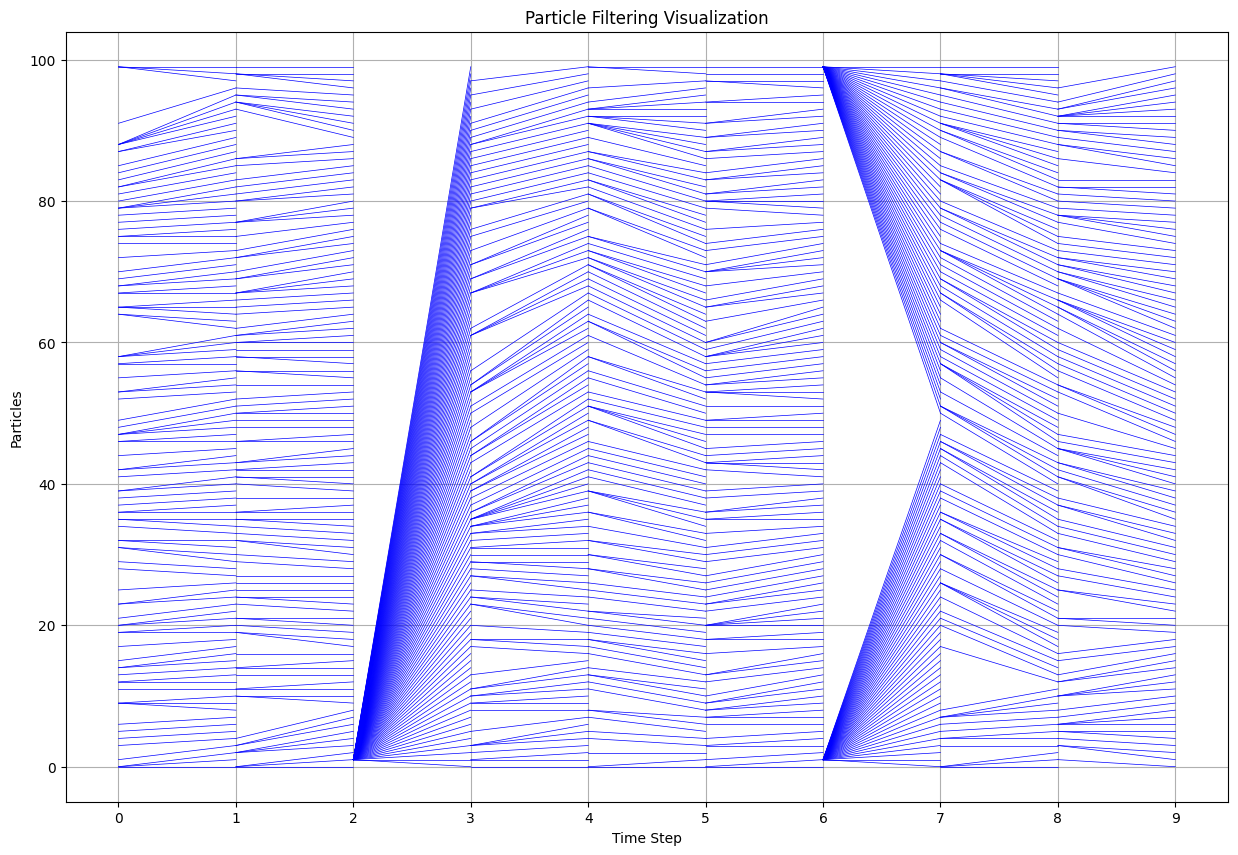

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(15, 10))

num_of_particles = 100


def unique_ranks(arr):
    # Sort the array and get indices
    sort_order = np.argsort(arr)
    sorted_arr = arr[sort_order]
    
    # Initialize the rank array with zeros
    ranks = np.zeros_like(arr)
    
    # The first element in the sorted array gets the first rank
    current_rank = 0
    ranks[sort_order[0]] = current_rank
    
    # Iterate over the sorted array to assign ranks
    for i in range(1, len(arr)):
        # Increase the rank only if the current value is different from the previous
        if sorted_arr[i] != sorted_arr[i - 1]:
            current_rank += 1
        # Assign the next rank, making sure it's unique by adding the difference from 'i'
        ranks[sort_order[i]] = current_rank + (i - current_rank)
        
    return ranks


# Simulate the resampling indices 
np.random.seed(0)
resampling_indices = np.array([
    np.arange(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 1 prev. particle
    np.ones(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 2 prev. particles
    np.concatenate([np.ones(int(num_of_particles / 2)), num_of_particles - np.ones(int(num_of_particles / 2))]),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True)
])


# Print the first few elements of first few arrays for verification/debugging
for i, arr in enumerate(resampling_indices):
    print(f"Array {i+1}: {arr[:5]} ... {arr[num_of_particles-5:]}")


# Create a positions array to sort the elements based on which previous particle
# that they are resampled from.
# This cleans up the visualization and prevents lines from crossing. 
    
# We don't want to sort the index arrays themselves,
# as this will provide false information as to where each particle came from.
    
positions = np.zeros_like(resampling_indices, dtype=int)
positions[0] = np.arange(num_of_particles)  # Initial positions are just the particle indices

for step in range(1, len(resampling_indices)):
    positions[step] = unique_ranks(resampling_indices[step])
    

for step in range(1, len(positions)):
    
    for p in range(num_of_particles):
        plt.plot([step-1, step], [resampling_indices[step][p], positions[step, p]], linestyle='solid', color='blue', markersize=0.1, linewidth=0.5)

# TODO: Trace the ending particles back through the chart in red?

plt.xlabel('Time Step')
plt.ylabel('Particles')
plt.title('Particle Filtering Visualization')
plt.grid(True)
plt.xticks(np.arange(len(resampling_indices)))
plt.show()


Array 1: [0. 1. 2. 3. 4.] ... [995. 996. 997. 998. 999.]
Array 2: [684. 559. 629. 192. 835.] ... [915. 162.  50. 242. 870.]
Array 3: [ 20. 683. 630. 128. 484.] ... [974. 930. 541.  51. 473.]
Array 4: [1. 1. 1. 1. 1.] ... [1. 1. 1. 1. 1.]
Array 5: [437. 772. 192. 891. 154.] ... [602. 112. 107. 149. 590.]
Array 6: [269.  67. 873. 401. 261.] ... [160. 225. 422. 580. 862.]
Array 7: [260. 335. 127. 277. 889.] ... [956. 594. 476. 574. 907.]
Array 8: [1. 1. 1. 1. 1.] ... [999. 999. 999. 999. 999.]
Array 9: [689. 191. 884. 615. 649.] ... [896. 441. 894. 526. 356.]
Array 10: [135. 816.  73. 108. 561.] ... [552. 904. 256. 288. 396.]


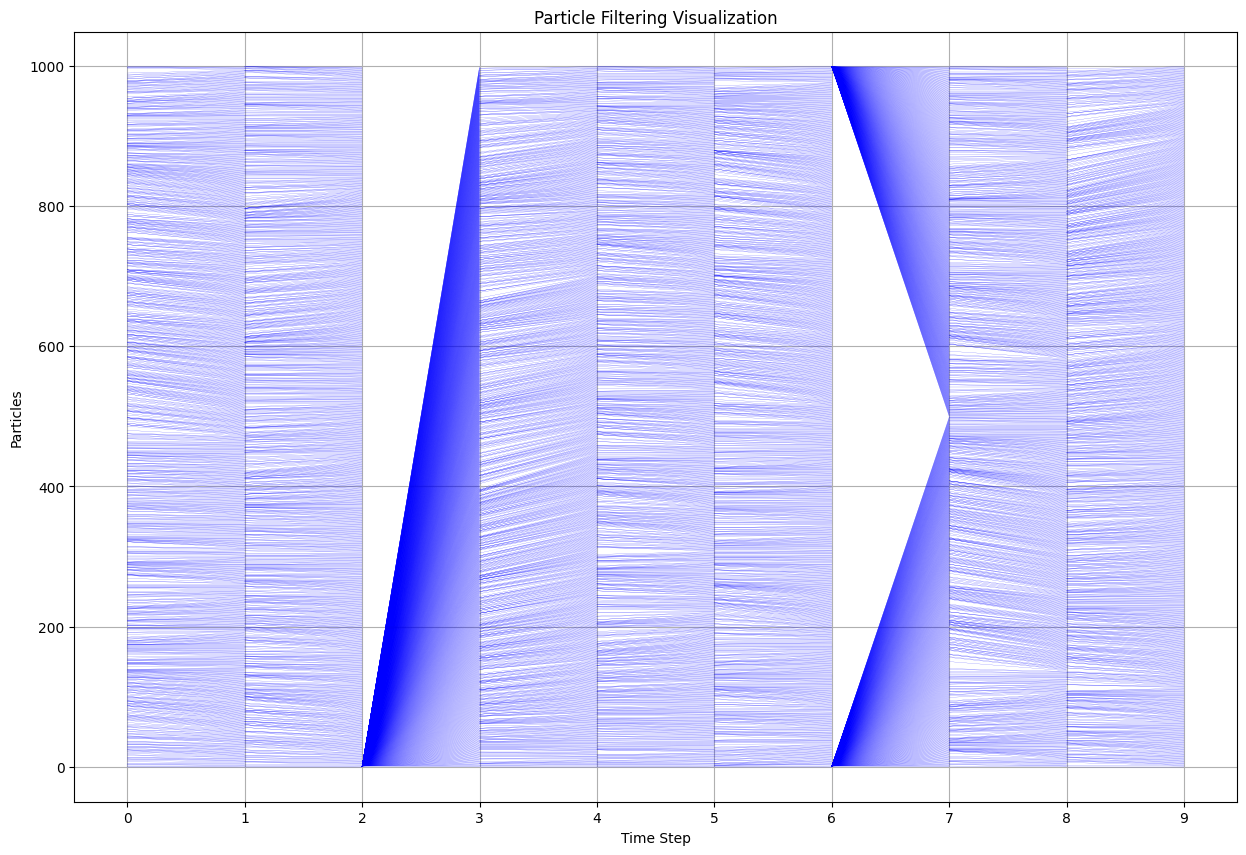

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(15, 10))

num_of_particles = 1000


def unique_ranks(arr):
    # Sort the array and get indices
    sort_order = np.argsort(arr)
    sorted_arr = arr[sort_order]
    
    # Initialize the rank array with zeros
    ranks = np.zeros_like(arr)
    
    # The first element in the sorted array gets the first rank
    current_rank = 0
    ranks[sort_order[0]] = current_rank
    
    # Iterate over the sorted array to assign ranks
    for i in range(1, len(arr)):
        # Increase the rank only if the current value is different from the previous
        if sorted_arr[i] != sorted_arr[i - 1]:
            current_rank += 1
        # Assign the next rank, making sure it's unique by adding the difference from 'i'
        ranks[sort_order[i]] = current_rank + (i - current_rank)
        
    return ranks


# Simulate the resampling indices 
np.random.seed(0)
resampling_indices = np.array([
    np.arange(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 1 prev. particle
    np.ones(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 2 prev. particles
    np.concatenate([np.ones(int(num_of_particles / 2)), num_of_particles - np.ones(int(num_of_particles / 2))]),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True)
])


# Print the first few elements of first few arrays for verification/debugging
for i, arr in enumerate(resampling_indices):
    print(f"Array {i+1}: {arr[:5]} ... {arr[num_of_particles-5:]}")


# Create a positions array to sort the elements based on which previous particle
# that they are resampled from.
# This cleans up the visualization and prevents lines from crossing. 
    
# We don't want to outright "sort" the index arrays themselves,
# as this will provide false information as to where each particle came from.
    
positions = np.zeros_like(resampling_indices, dtype=int)
positions[0] = np.arange(num_of_particles)  # Initial positions are just the particle indices

for step in range(1, len(resampling_indices)):
    positions[step] = unique_ranks(resampling_indices[step])
   
   
for step in range(1, len(positions)):
    for p in range(num_of_particles):
        plt.plot([step-1, step], [resampling_indices[step][p], positions[step, p]], linestyle='solid', color='blue', markersize=0.1, linewidth=0.1)

# TODO: Trace the ending particles back through the chart in red?

plt.xlabel('Time Step')
plt.ylabel('Particles')
plt.title('Particle Filtering Visualization')
plt.grid(True)
plt.xticks(np.arange(len(resampling_indices)))
plt.show()


Array 1: [0. 1. 2. 3. 4.] ... [9995. 9996. 9997. 9998. 9999.]
Array 2: [2732. 9845. 3264. 4859. 9225.] ... [5263. 4432. 4906. 4709. 7923.]
Array 3: [2308.  934.  966. 3955. 9137.] ... [6238. 4095. 4240.  639. 1659.]
Array 4: [1. 1. 1. 1. 1.] ... [1. 1. 1. 1. 1.]
Array 5: [4784. 6571. 8063. 2244. 1571.] ... [3025. 9387. 3982. 8744. 5819.]
Array 6: [7652. 6230. 1597. 5190. 8118.] ... [5646. 7516. 5484. 9029. 2966.]
Array 7: [4554.  606. 9083. 6224. 4807.] ... [2727. 1947.  685. 2506.  646.]
Array 8: [1. 1. 1. 1. 1.] ... [9999. 9999. 9999. 9999. 9999.]
Array 9: [2713. 6928. 9595. 4327. 4486.] ... [1529. 4711. 9517. 6956. 1514.]
Array 10: [9095. 9345. 5251.  800. 8467.] ... [ 927. 7823. 9895. 7691. 9487.]


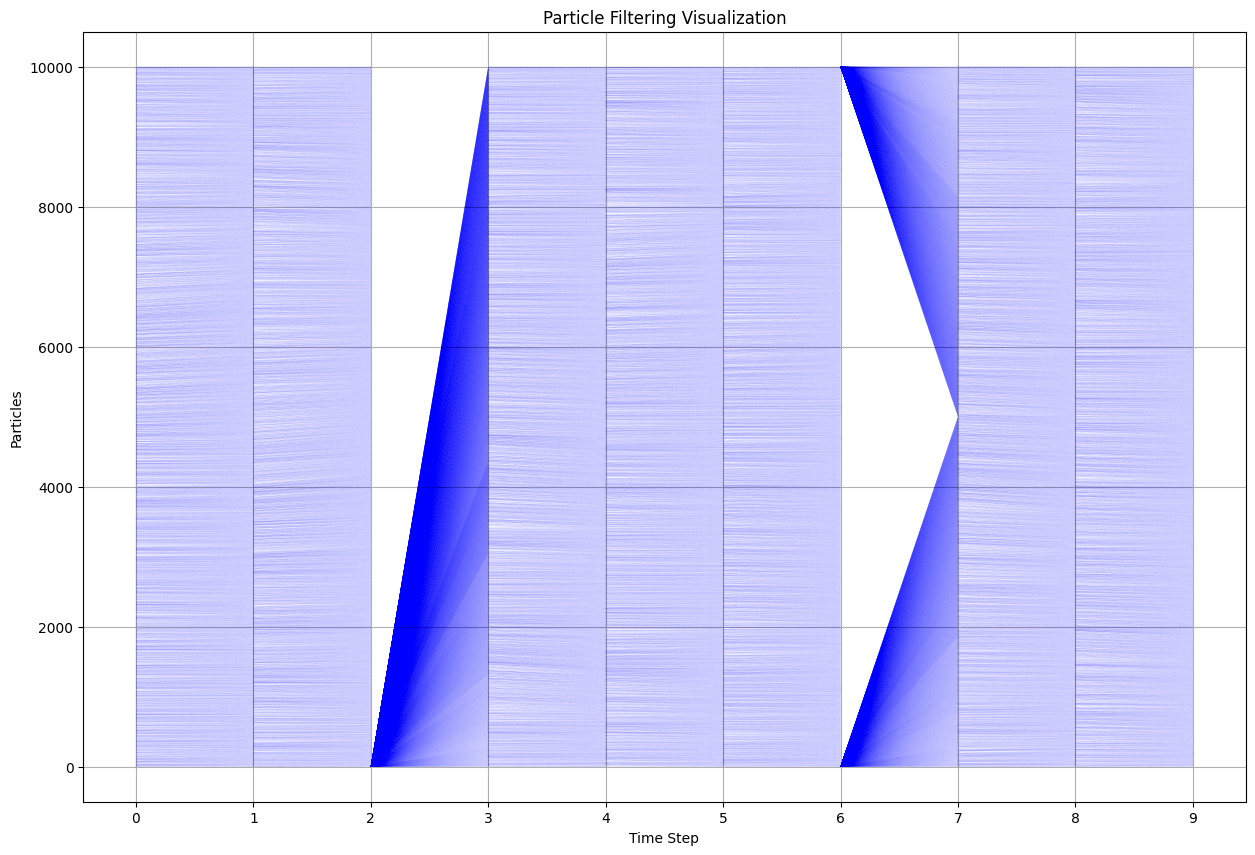

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(15, 10))

num_of_particles = 10000


def unique_ranks(arr):
    # Sort the array and get indices
    sort_order = np.argsort(arr)
    sorted_arr = arr[sort_order]
    
    # Initialize the rank array with zeros
    ranks = np.zeros_like(arr)
    
    # The first element in the sorted array gets the first rank
    current_rank = 0
    ranks[sort_order[0]] = current_rank
    
    # Iterate over the sorted array to assign ranks
    for i in range(1, len(arr)):
        # Increase the rank only if the current value is different from the previous
        if sorted_arr[i] != sorted_arr[i - 1]:
            current_rank += 1
        # Assign the next rank, making sure it's unique by adding the difference from 'i'
        ranks[sort_order[i]] = current_rank + (i - current_rank)
        
    return ranks


# Simulate the resampling indices 
np.random.seed(0)
resampling_indices = np.array([
    np.arange(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 1 prev. particle
    np.ones(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 2 prev. particles
    np.concatenate([np.ones(int(num_of_particles / 2)), num_of_particles - np.ones(int(num_of_particles / 2))]),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True)
])


# Print the first few elements of first few arrays for verification/debugging
for i, arr in enumerate(resampling_indices):
    print(f"Array {i+1}: {arr[:5]} ... {arr[num_of_particles-5:]}")


# Create a positions array to sort the elements based on which previous particle
# that they are resampled from.
# This cleans up the visualization and prevents lines from crossing. 
    
# We don't want to outright "sort" the index arrays themselves,
# as this will provide false information as to where each particle came from.
positions = np.zeros_like(resampling_indices, dtype=int)
positions[0] = np.arange(num_of_particles)  # Initial positions are just the particle indices

for step in range(1, len(resampling_indices)):
    positions[step] = unique_ranks(resampling_indices[step])
   
   
for step in range(1, len(positions)):
    for p in range(num_of_particles):
        plt.plot([step-1, step], [resampling_indices[step][p], positions[step, p]], linestyle='solid', color='blue', markersize=0.1, linewidth=0.01)

# TODO: Trace the ending particles back through the chart in red?

plt.xlabel('Time Step')
plt.ylabel('Particles')
plt.title('Particle Filtering Visualization')
plt.grid(True)
plt.xticks(np.arange(len(resampling_indices)))
plt.show()


## Testing unique ranks code

In [17]:
import numpy as np

def unique_ranks(arr):
    # Sort the array and get indices
    sort_order = np.argsort(arr)
    print("Sort Order: ", sort_order)
    sorted_arr = arr[sort_order]
    print("Sorted Array: ", sorted_arr)
    
    # Initialize the rank array with zeros
    ranks = np.zeros_like(arr)
    
    # The first element in the sorted array gets the first rank
    current_rank = 0
    ranks[sort_order[0]] = current_rank
    
    # Iterate over the sorted array to assign ranks
    for i in range(1, len(arr)):
        # Increase the rank only if the current value is different from the previous
        if sorted_arr[i] != sorted_arr[i - 1]:
            current_rank += 1
        # Assign the next rank, making sure it's unique by adding the difference from 'i'
        ranks[sort_order[i]] = current_rank + (i - current_rank)
        
    return ranks


arrays = [np.array([4, 3, 3, 3, 4]),
          np.array([1,3,5,1,3,5,5,3,1]),
          np.array([1,3,5,7,9,7,5,0,3,1])]


for arr in arrays:
    print("Array:", arr)  
    print("Unique ranks:", unique_ranks(arr), "\n")


Array: [4 3 3 3 4]
Sort Order:  [1 2 3 0 4]
Sorted Array:  [3 3 3 4 4]
Unique ranks: [3 0 1 2 4] 

Array: [1 3 5 1 3 5 5 3 1]
Sort Order:  [0 3 8 1 4 7 2 5 6]
Sorted Array:  [1 1 1 3 3 3 5 5 5]
Unique ranks: [0 3 6 1 4 7 8 5 2] 

Array: [1 3 5 7 9 7 5 0 3 1]
Sort Order:  [7 0 9 1 8 2 6 3 5 4]
Sorted Array:  [0 1 1 3 3 5 5 7 7 9]
Unique ranks: [1 3 5 7 9 8 6 0 4 2] 

